In [9]:
import pandas as pd
import numpy as np
from regime_detection_tf import regime_detection_tf
from exploratory_data_analysis import financial_data
from regime_prediction import regime_prediction_ml
from regime_detection_jump2 import regime_detection_jump

# ticker = "^SPGSCI"
# start_date = "1991-05-01"
interval = "1mo"

ticker = "DBC"
start_date = "2006-02-03"

gsci = financial_data(ticker, start_date, interval)

lambda_vals = [0.04, 0.08, 0.12, 0.16]
model_gsci = regime_detection_tf(gsci, lambda_vals)
model_gsci.run_model(tuning=True)

[*********************100%%**********************]  1 of 1 completed


/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime-detection/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime_detection_tf.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Smoothed'] = best_smoothed_prices
/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime_detection

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Log Return,Cumulative Log Return,Smoothed,regimes
Date,,,,,,,,,,,
2009-03-01,18.650000,21.389999,17.940001,20.00,18.410921,39466300,0.046572,0.045521,-0.469245,-0.355183,E
2012-11-01,27.660000,28.190001,27.080000,28.10,25.867342,35392100,0.019594,0.019404,-0.129208,-0.144253,C
2016-01-01,13.420000,13.510000,11.700000,12.78,11.764578,51971600,-0.043413,-0.044384,-0.917096,-0.776192,E
2018-06-01,17.940001,17.969999,17.090000,17.68,16.275253,59727300,-0.019412,-0.019603,-0.592544,-0.686739,C
2020-06-01,11.730000,12.520000,11.720000,12.31,11.662995,21433400,0.044991,0.044009,-0.925768,-0.808393,E


Epoch 1/50
3/3 [==============================] - 4s 415ms/step - loss: 0.6941 - accuracy: 0.4412 - val_loss: 0.7482 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 110ms/step - loss: 0.6496 - accuracy: 0.6471 - val_loss: 0.8163 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 85ms/step - loss: 0.6411 - accuracy: 0.6471 - val_loss: 0.8796 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 84ms/step - loss: 0.6367 - accuracy: 0.6471 - val_loss: 0.8730 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 86ms/step - loss: 0.6249 - accuracy: 0.6471 - val_loss: 0.8464 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 98ms/step - loss: 0.6264 - accuracy: 0.6471 - val_loss: 0.8315 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 88ms/step - loss: 0.6211 - accuracy: 0.6471 - val_loss: 0.8377 - val_accuracy: 0.0000e+

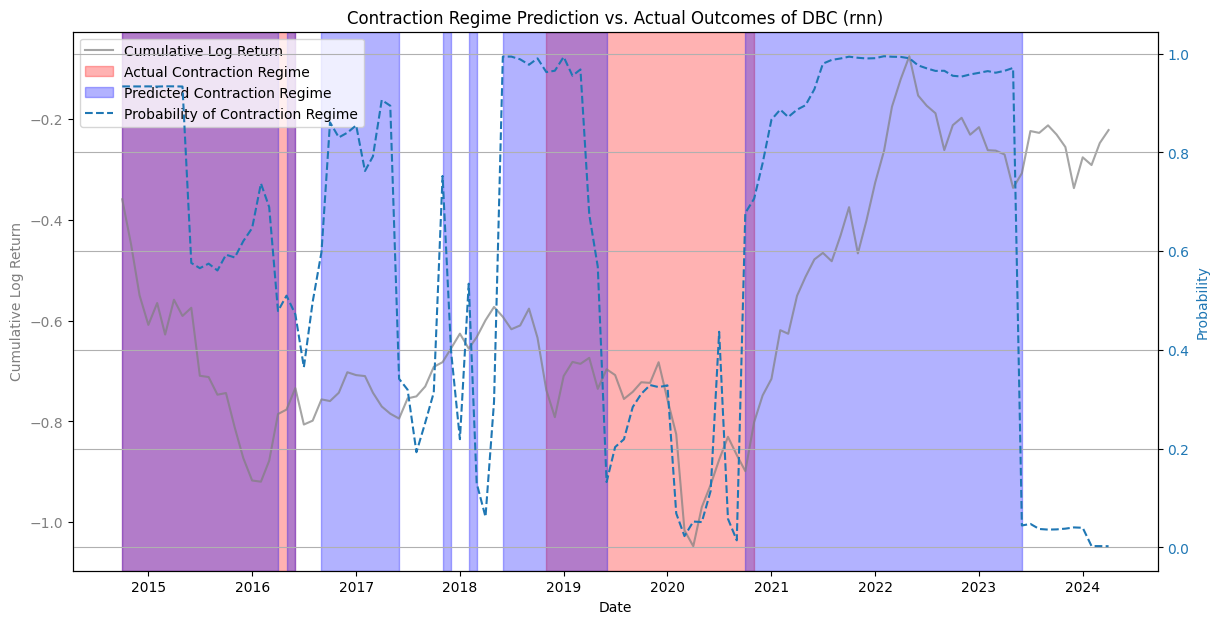

In [10]:
macro_data_path = "current.csv"
model_type = 'rnn'
gsci_prediction = regime_prediction_ml(model_gsci, macro_data_path, model_type=model_type, use_macro_data=True)
gsci_prediction.run()